In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))

# 2. Bagging with Decision Tree
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging accuracy:", accuracy_score(y_test, y_pred_bagging))


# 3. AdaBoost with Decision Tree (stump)
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost accuracy:", accuracy_score(y_test, y_pred_ada))



Random Forest accuracy: 1.0
Bagging accuracy: 1.0
AdaBoost accuracy: 1.0



Random Forest Accuracy: 0.9708
Random Forest Confusion Matrix:
[[ 59   4]
 [  1 107]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Random Forest Cross-Validation Accuracy: 0.9497 (+/- 0.0181)


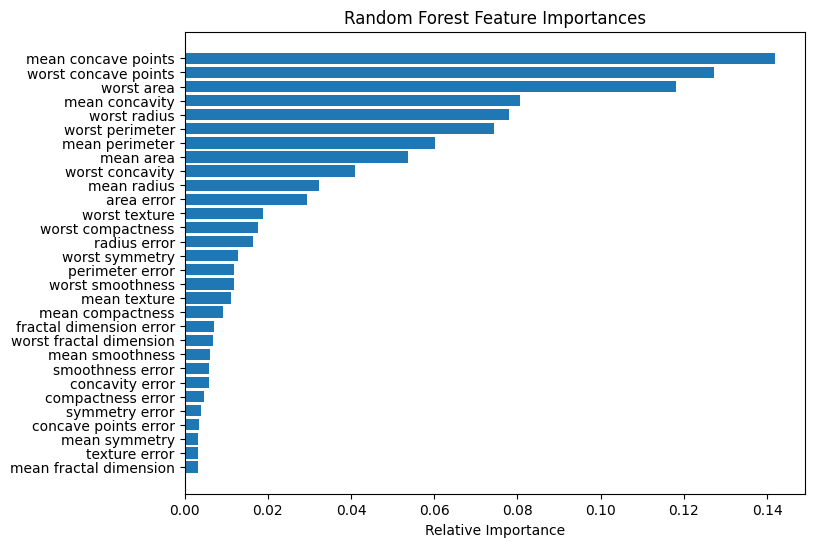


Bagging Accuracy: 0.9591
Bagging Confusion Matrix:
[[ 59   4]
 [  3 105]]
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Bagging Cross-Validation Accuracy: 0.9497 (+/- 0.0158)

AdaBoost Accuracy: 0.9708
AdaBoost Confusion Matrix:
[[ 62   1]
 [  4 104]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AdaBoost Cross-Validation Accuracy: 0.9623 (+/- 0.0080)


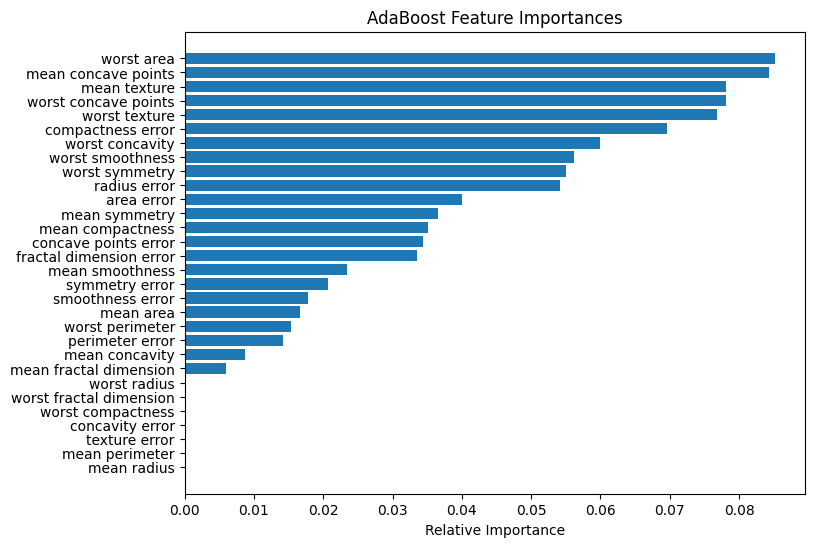

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

def evaluate_model(clf, X_train, X_test, y_train, y_test, model_name, feature_names=None):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:\n{cm}")

    cr = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n{cr}")

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    if feature_names is not None and hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(8,6))
        plt.title(f'{model_name} Feature Importances')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

def main(X, y, feature_names=None):
    if y.dtype == object or isinstance(y[0], str):
        le = LabelEncoder()
        y = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest", feature_names)

    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
    evaluate_model(bagging, X_train, X_test, y_train, y_test, "Bagging", feature_names)

    ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
    evaluate_model(ada, X_train, X_test, y_train, y_test, "AdaBoost", feature_names)


if __name__ == "__main__":
    from sklearn.datasets import load_breast_cancer
    breast_cancer = load_breast_cancer()
    main(breast_cancer.data, breast_cancer.target, breast_cancer.feature_names)



Random Forest Accuracy: 0.9708
Random Forest Confusion Matrix:
[[ 59   4]
 [  1 107]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Random Forest Cross-Validation Accuracy: 0.9497 (+/- 0.0181)


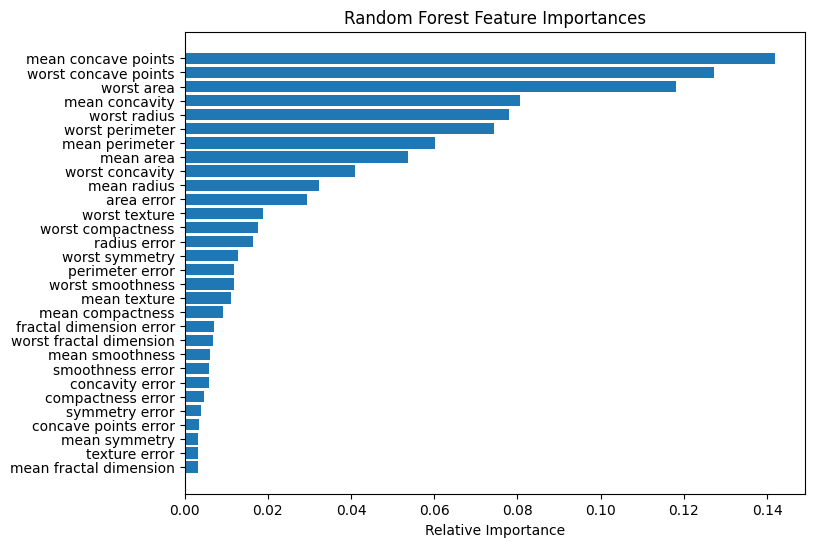

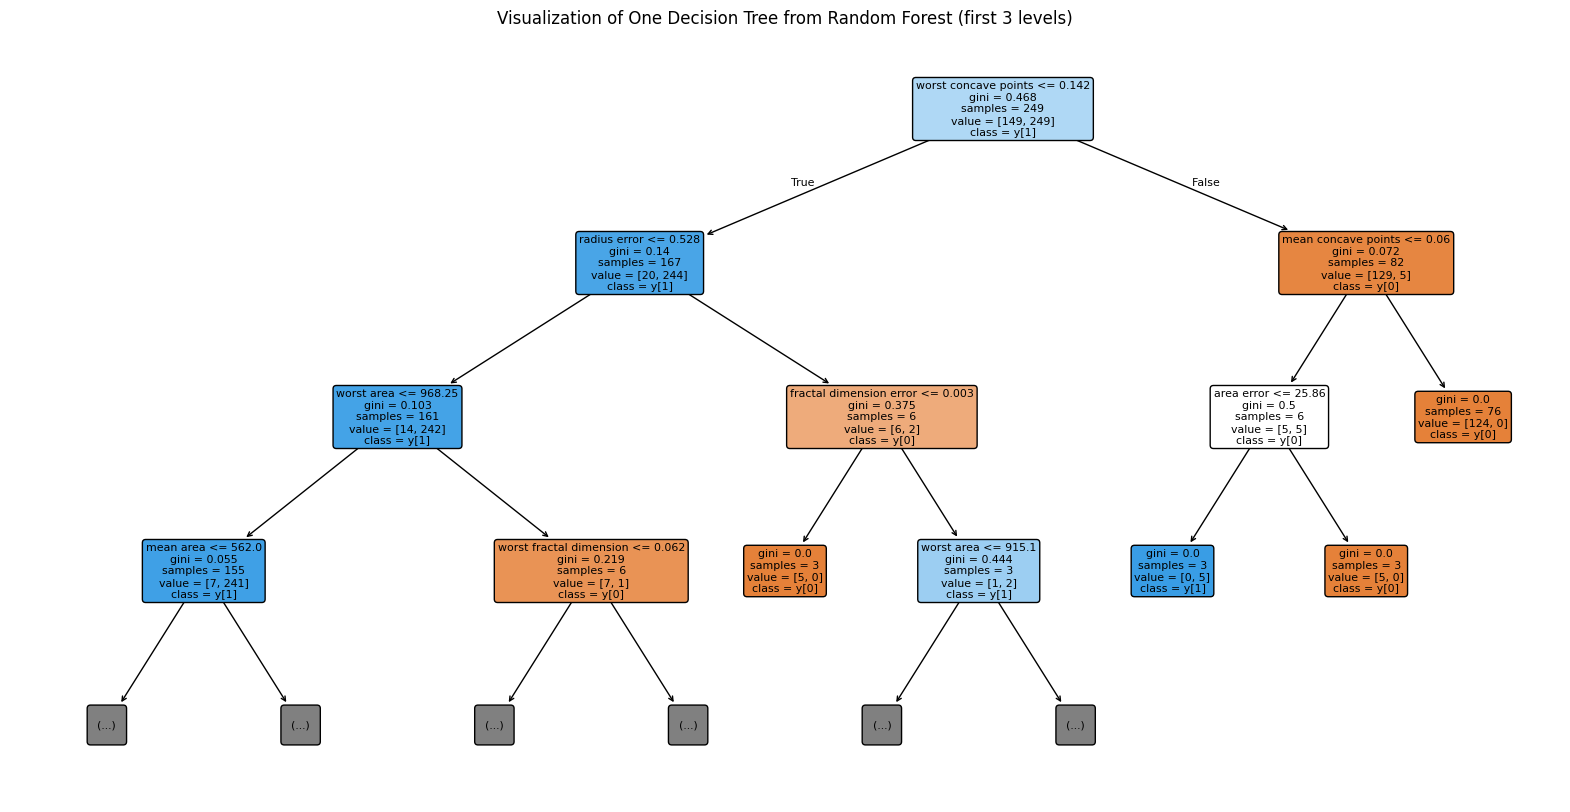


Bagging Accuracy: 0.9591
Bagging Confusion Matrix:
[[ 59   4]
 [  3 105]]
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Bagging Cross-Validation Accuracy: 0.9497 (+/- 0.0158)

AdaBoost Accuracy: 0.9708
AdaBoost Confusion Matrix:
[[ 62   1]
 [  4 104]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AdaBoost Cross-Validation Accuracy: 0.9623 (+/- 0.0080)


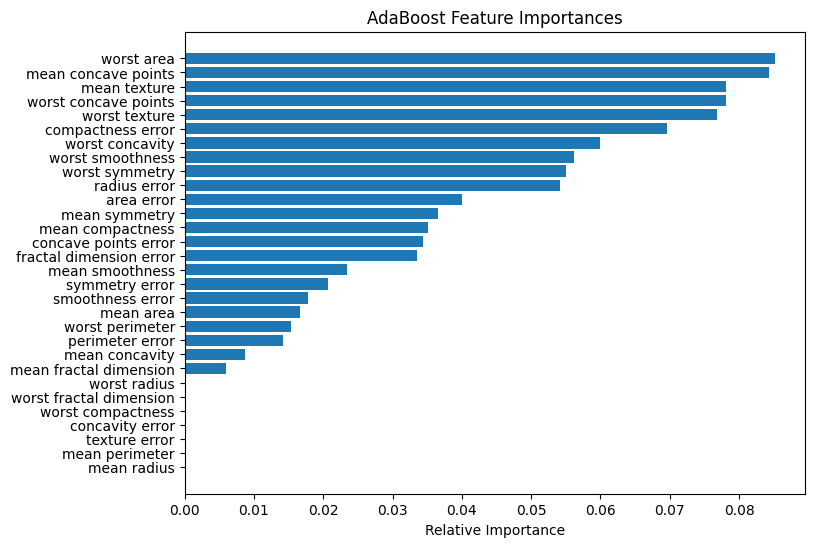

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

def evaluate_model(clf, X_train, X_test, y_train, y_test, model_name, feature_names=None):
    # Train the model
    clf.fit(X_train, y_train)
    # Predict test set
    y_pred = clf.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:\n{cm}")

    # Classification Report
    cr = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n{cr}")

    # Cross-validation score on training data (5-fold)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Feature Importance (only if supported and feature names provided)
    if feature_names is not None and hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(8,6))
        plt.title(f'{model_name} Feature Importances')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

def visualize_one_tree(rf_clf, feature_names):
    # Visualize the first tree of the Random Forest
    estimator = rf_clf.estimators_[0]
    plt.figure(figsize=(20,10))
    plot_tree(estimator, filled=True, feature_names=feature_names, class_names=True, rounded=True, max_depth=3)
    plt.title("Visualization of One Decision Tree from Random Forest (first 3 levels)")
    plt.show()

def main(X, y, feature_names=None):
    # Encode target if categorical strings
    if y.dtype == object or isinstance(y[0], str):
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest", feature_names)
    visualize_one_tree(rf, feature_names)

    # Bagging
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
    evaluate_model(bagging, X_train, X_test, y_train, y_test, "Bagging", feature_names)

    # AdaBoost
    ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
    evaluate_model(ada, X_train, X_test, y_train, y_test, "AdaBoost", feature_names)


if __name__ == "__main__":
    from sklearn.datasets import load_breast_cancer
    breast_cancer = load_breast_cancer()
    main(breast_cancer.data, breast_cancer.target, breast_cancer.feature_names)


In [8]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Load data and split
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42)

######################
# 1. Bagging (majority vote)
######################

n_trees = 10  # smaller number for demonstration

print("---- BAGGING STEP-BY-STEP ----")

# Train individual trees on bootstrapped samples
trees = []
train_size = X_train.shape[0]

# Store predictions of all trees for test set
all_tree_preds = []

for i in range(n_trees):
    # Bootstrap sampling
    indices = np.random.choice(train_size, size=train_size, replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]

    tree = DecisionTreeClassifier(random_state=42 + i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)

    y_pred_single = tree.predict(X_test)
    all_tree_preds.append(y_pred_single)

    acc_single = accuracy_score(y_test, y_pred_single)
    print(f"Tree {i+1} accuracy on test set: {acc_single:.4f}")

# Combine predictions by majority voting
all_tree_preds = np.array(all_tree_preds)  # shape (n_trees, n_samples)

# For each test sample, count votes and pick majority class
combined_preds = []
for col in all_tree_preds.T:
    vote_counts = Counter(col)
    combined_preds.append(vote_counts.most_common(1)[0][0])
combined_preds = np.array(combined_preds)

acc_combined = accuracy_score(y_test, combined_preds)
print(f"Combined Bagging accuracy after {n_trees} trees: {acc_combined:.4f}")



######################
# 2. Boosting (AdaBoost style, decision stumps)
######################

print("\n---- BOOSTING STEP-BY-STEP ----")

n_rounds = 10  # number of weak learners
m = X_train.shape[0]

# Initialize weights uniformly
weights = np.ones(m) / m

alpha_list = []    # store learner weights
predictions_list = []

for t in range(n_rounds):
    # Train stump with weighted samples
    stump = DecisionTreeClassifier(max_depth=1, random_state=42 + t)
    stump.fit(X_train, y_train, sample_weight=weights)

    pred_train = stump.predict(X_train)
    incorrect = (pred_train != y_train)

    # Weighted error rate
    err = np.dot(weights, incorrect) / np.sum(weights)
    print(f"Round {t+1}, weighted error: {err:.4f}")

    # Avoid divide by zero or error=0 or 1
    if err == 0:
        alpha = 1
    elif err >= 0.5:
        print("Error >= 0.5, stopping early")
        break
    else:
        alpha = 0.5 * np.log((1 - err) / err)

    print(f"Round {t+1}, learner weight (alpha): {alpha:.4f}")
    alpha_list.append(alpha)
    predictions_list.append(stump)

    # Update weights
    weights = weights * np.exp(-alpha * y_train * (2*pred_train -1))  # y_train mapped 0->-1,1->1 if needed
    # Let's remap y_train and pred_train to -1/1 for weight update
    y_train_mapped = np.where(y_train==0, -1, 1)
    pred_train_mapped = np.where(pred_train==0, -1, 1)
    weights = weights * np.exp(-alpha * y_train_mapped * pred_train_mapped)

    # Normalize weights
    weights /= np.sum(weights)

    # Predict on test using all classifiers so far (weighted vote)
    agg_pred = np.zeros(len(y_test))
    for alpha_i, clf_i in zip(alpha_list, predictions_list):
        pred_i = clf_i.predict(X_test)
        pred_i_mapped = np.where(pred_i == 0, -1, 1)
        agg_pred += alpha_i * pred_i_mapped

    # Final prediction sign
    y_pred_final = np.where(agg_pred >= 0, 1, 0)

    acc = accuracy_score(y_test, y_pred_final)
    print(f"Combined AdaBoost accuracy after {t+1} rounds: {acc:.4f}\n")


---- BAGGING STEP-BY-STEP ----
Tree 1 accuracy on test set: 0.9181
Tree 2 accuracy on test set: 0.9415
Tree 3 accuracy on test set: 0.9123
Tree 4 accuracy on test set: 0.9415
Tree 5 accuracy on test set: 0.9181
Tree 6 accuracy on test set: 0.9357
Tree 7 accuracy on test set: 0.9415
Tree 8 accuracy on test set: 0.9123
Tree 9 accuracy on test set: 0.9181
Tree 10 accuracy on test set: 0.9123
Combined Bagging accuracy after 10 trees: 0.9532

---- BOOSTING STEP-BY-STEP ----
Round 1, weighted error: 0.0754
Round 1, learner weight (alpha): 1.2534
Combined AdaBoost accuracy after 1 rounds: 0.8947

Round 2, weighted error: 0.0842
Round 2, learner weight (alpha): 1.1934
Combined AdaBoost accuracy after 2 rounds: 0.8947

Round 3, weighted error: 0.1597
Round 3, learner weight (alpha): 0.8304
Combined AdaBoost accuracy after 3 rounds: 0.9766

Round 4, weighted error: 0.1707
Round 4, learner weight (alpha): 0.7904
Combined AdaBoost accuracy after 4 rounds: 0.9591

Round 5, weighted error: 0.1252
Ro

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

def random_forest_evaluation(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {acc:.4f}")

def bagging_step_by_step(X_train, X_test, y_train, y_test, n_trees=10):
    print("\n---- BAGGING STEP-BY-STEP ----")
    trees = []
    train_size = X_train.shape[0]
    all_tree_preds = []

    for i in range(n_trees):
        # Bootstrap sampling
        indices = np.random.choice(train_size, size=train_size, replace=True)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train[indices]

        tree = DecisionTreeClassifier(random_state=42 + i)
        tree.fit(X_bootstrap, y_bootstrap)
        trees.append(tree)

        y_pred_single = tree.predict(X_test)
        all_tree_preds.append(y_pred_single)

        acc_single = accuracy_score(y_test, y_pred_single)
        print(f"Tree {i+1} accuracy on test set: {acc_single:.4f}")

    # Combine predictions by majority voting
    all_tree_preds = np.array(all_tree_preds)  # shape (n_trees, n_samples)
    combined_preds = []
    for col in all_tree_preds.T:
        vote_counts = Counter(col)
        combined_preds.append(vote_counts.most_common(1)[0][0])
    combined_preds = np.array(combined_preds)

    acc_combined = accuracy_score(y_test, combined_preds)
    print(f"Combined Bagging accuracy after {n_trees} trees: {acc_combined:.4f}")

def boosting_step_by_step(X_train, X_test, y_train, y_test, n_rounds=10):
    print("\n---- BOOSTING STEP-BY-STEP ----")
    m = X_train.shape[0]

    # Initialize weights uniformly
    weights = np.ones(m) / m

    alpha_list = []
    predictions_list = []

    y_train_mapped = np.where(y_train == 0, -1, 1)

    for t in range(n_rounds):
        # Train stump with weighted samples
        stump = DecisionTreeClassifier(max_depth=1, random_state=42 + t)
        stump.fit(X_train, y_train, sample_weight=weights)

        pred_train = stump.predict(X_train)
        incorrect = (pred_train != y_train)

        # Weighted error rate
        err = np.dot(weights, incorrect) / np.sum(weights)
        print(f"Round {t+1}, weighted error: {err:.4f}")

        # Stop if error is too high or zero
        if err == 0:
            alpha = 1
        elif err >= 0.5:
            print("Error >= 0.5, stopping early")
            break
        else:
            alpha = 0.5 * np.log((1 - err) / err)

        print(f"Round {t+1}, learner weight (alpha): {alpha:.4f}")
        alpha_list.append(alpha)
        predictions_list.append(stump)

        # Update weights (using -1/+1 mapping)
        pred_train_mapped = np.where(pred_train == 0, -1, 1)
        weights = weights * np.exp(-alpha * y_train_mapped * pred_train_mapped)
        weights /= np.sum(weights)

        # Predict on test using weighted vote of all classifiers so far
        agg_pred = np.zeros(len(y_test))
        for alpha_i, clf_i in zip(alpha_list, predictions_list):
            pred_i = clf_i.predict(X_test)
            pred_i_mapped = np.where(pred_i == 0, -1, 1)
            agg_pred += alpha_i * pred_i_mapped

        y_pred_final = np.where(agg_pred >= 0, 1, 0)
        acc = accuracy_score(y_test, y_pred_final)
        print(f"Combined AdaBoost accuracy after {t+1} rounds: {acc:.4f}\n")

def main():
    data = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(
        data.data, data.target, test_size=0.3, random_state=42)

    # Random Forest
    random_forest_evaluation(X_train, X_test, y_train, y_test)

    # Bagging Step-by-step
    bagging_step_by_step(X_train, X_test, y_train, y_test, n_trees=10)

    # Boosting Step-by-step
    boosting_step_by_step(X_train, X_test, y_train, y_test, n_rounds=10)

if __name__ == "__main__":
    main()


Random Forest Accuracy: 0.9708

---- BAGGING STEP-BY-STEP ----
Tree 1 accuracy on test set: 0.9181
Tree 2 accuracy on test set: 0.9181
Tree 3 accuracy on test set: 0.9357
Tree 4 accuracy on test set: 0.9298
Tree 5 accuracy on test set: 0.9123
Tree 6 accuracy on test set: 0.9357
Tree 7 accuracy on test set: 0.9298
Tree 8 accuracy on test set: 0.9123
Tree 9 accuracy on test set: 0.9357
Tree 10 accuracy on test set: 0.9064
Combined Bagging accuracy after 10 trees: 0.9532

---- BOOSTING STEP-BY-STEP ----
Round 1, weighted error: 0.0754
Round 1, learner weight (alpha): 1.2534
Combined AdaBoost accuracy after 1 rounds: 0.8947

Round 2, weighted error: 0.1561
Round 2, learner weight (alpha): 0.8439
Combined AdaBoost accuracy after 2 rounds: 0.8947

Round 3, weighted error: 0.1665
Round 3, learner weight (alpha): 0.8054
Combined AdaBoost accuracy after 3 rounds: 0.9766

Round 4, weighted error: 0.2387
Round 4, learner weight (alpha): 0.5800
Combined AdaBoost accuracy after 4 rounds: 0.9591

Ro

Random Forest Accuracy: 0.9708

Visualizing one tree from Random Forest:


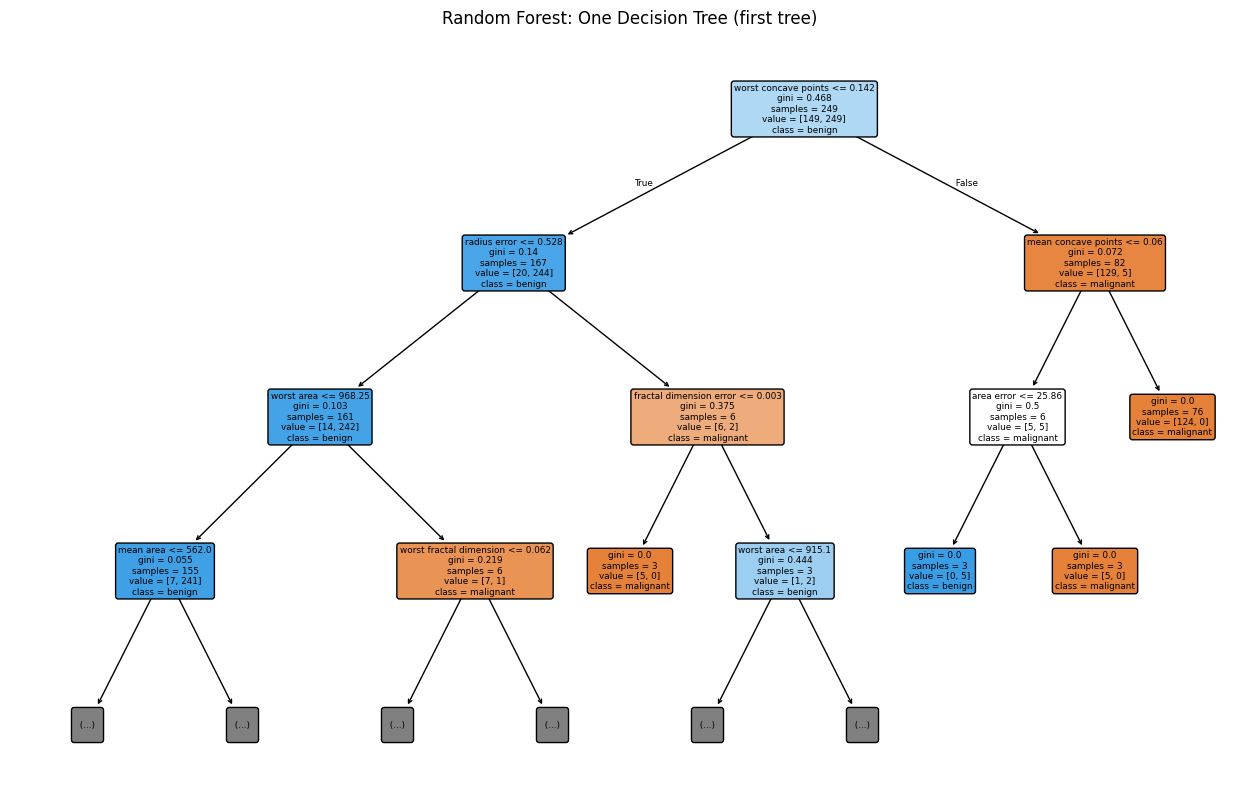


---- BAGGING STEP-BY-STEP ----
Tree 1 accuracy on test set: 0.9181

Visualizing Tree 1 from Bagging:


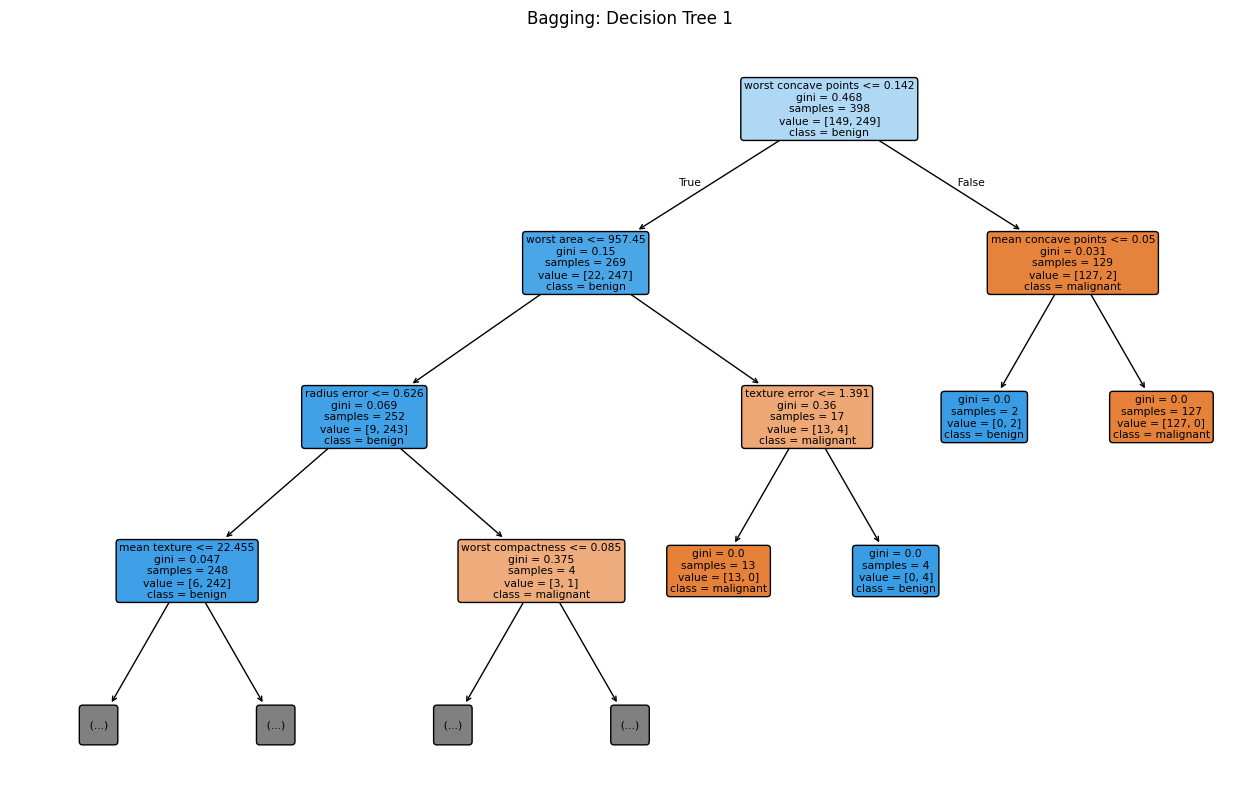

Tree 2 accuracy on test set: 0.9181
Tree 3 accuracy on test set: 0.9064
Tree 4 accuracy on test set: 0.9474
Tree 5 accuracy on test set: 0.9006
Tree 6 accuracy on test set: 0.9532
Tree 7 accuracy on test set: 0.9064
Tree 8 accuracy on test set: 0.9298
Tree 9 accuracy on test set: 0.9415
Tree 10 accuracy on test set: 0.9474
Combined Bagging accuracy after 10 trees: 0.9532

---- BOOSTING STEP-BY-STEP ----
Round 1, weighted error: 0.0754
Round 1, learner weight (alpha): 1.2534

Visualizing Decision Stump from Boosting (Round 1):


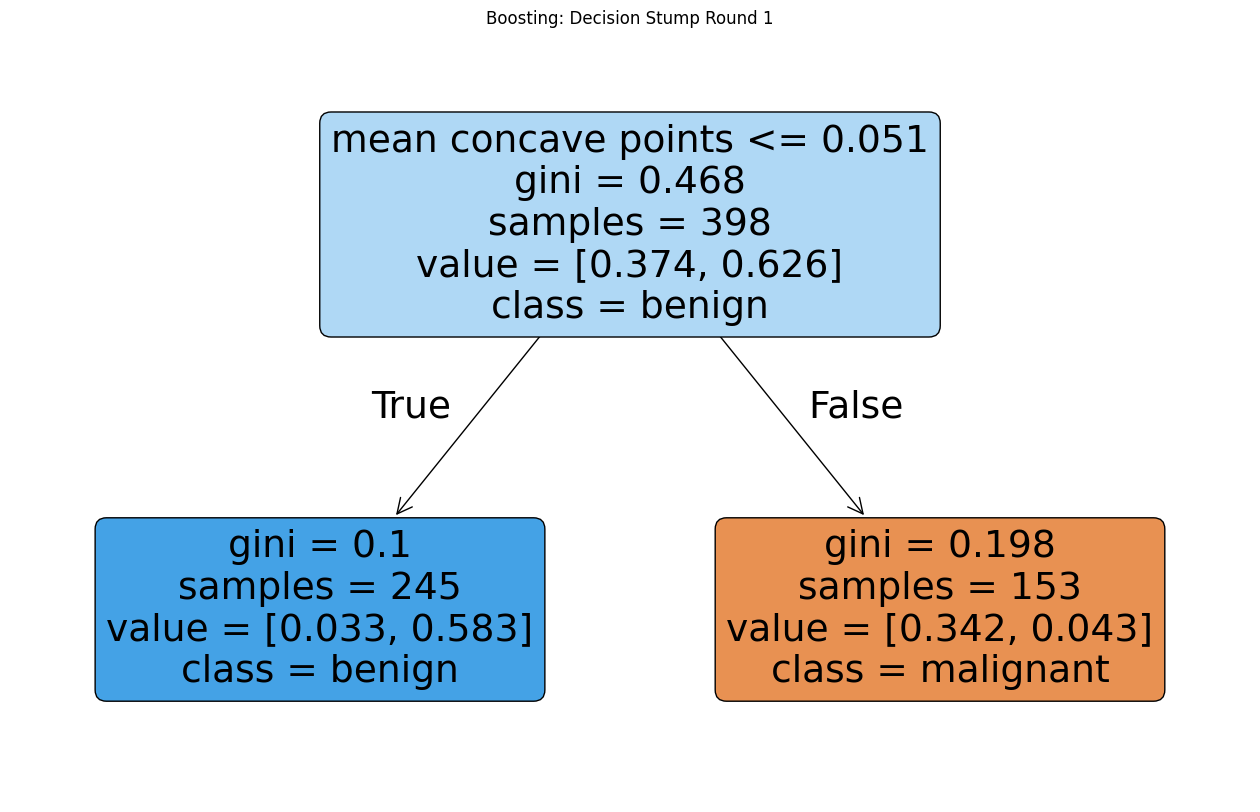

Combined AdaBoost accuracy after 1 rounds: 0.8947

Round 2, weighted error: 0.1561
Round 2, learner weight (alpha): 0.8439
Combined AdaBoost accuracy after 2 rounds: 0.8947

Round 3, weighted error: 0.1665
Round 3, learner weight (alpha): 0.8054
Combined AdaBoost accuracy after 3 rounds: 0.9766

Round 4, weighted error: 0.2387
Round 4, learner weight (alpha): 0.5800
Combined AdaBoost accuracy after 4 rounds: 0.9591

Round 5, weighted error: 0.2417
Round 5, learner weight (alpha): 0.5716
Combined AdaBoost accuracy after 5 rounds: 0.9766

Round 6, weighted error: 0.3195
Round 6, learner weight (alpha): 0.3780
Combined AdaBoost accuracy after 6 rounds: 0.9766

Round 7, weighted error: 0.3049
Round 7, learner weight (alpha): 0.4120
Combined AdaBoost accuracy after 7 rounds: 0.9766

Round 8, weighted error: 0.2143
Round 8, learner weight (alpha): 0.6497
Combined AdaBoost accuracy after 8 rounds: 0.9766

Round 9, weighted error: 0.3306
Round 9, learner weight (alpha): 0.3527
Combined AdaBoos

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

def plot_tree_from_clf(clf, feature_names, class_names, title, max_depth=3):
    plt.figure(figsize=(16,10))
    plot_tree(clf, feature_names=feature_names, class_names=class_names,
              filled=True, rounded=True, max_depth=max_depth)
    plt.title(title)
    plt.show()

def random_forest_evaluation(X_train, X_test, y_train, y_test, feature_names, class_names):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {acc:.4f}")

    # Plot one tree from the forest (first estimator)
    print("\nVisualizing one tree from Random Forest:")
    plot_tree_from_clf(rf.estimators_[0], feature_names, class_names, 
                       "Random Forest: One Decision Tree (first tree)")

def bagging_step_by_step(X_train, X_test, y_train, y_test, feature_names, class_names, n_trees=10):
    print("\n---- BAGGING STEP-BY-STEP ----")
    trees = []
    train_size = X_train.shape[0]
    all_tree_preds = []

    for i in range(n_trees):
        # Bootstrap sampling
        indices = np.random.choice(train_size, size=train_size, replace=True)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train[indices]

        tree = DecisionTreeClassifier(random_state=42 + i)
        tree.fit(X_bootstrap, y_bootstrap)
        trees.append(tree)

        y_pred_single = tree.predict(X_test)
        all_tree_preds.append(y_pred_single)

        acc_single = accuracy_score(y_test, y_pred_single)
        print(f"Tree {i+1} accuracy on test set: {acc_single:.4f}")

        # Plot first tree only (for brevity)
        if i == 0:
            print("\nVisualizing Tree 1 from Bagging:")
            plot_tree_from_clf(tree, feature_names, class_names, "Bagging: Decision Tree 1")

    # Combine predictions by majority voting
    all_tree_preds = np.array(all_tree_preds)  # shape (n_trees, n_samples)
    combined_preds = []
    for col in all_tree_preds.T:
        vote_counts = Counter(col)
        combined_preds.append(vote_counts.most_common(1)[0][0])
    combined_preds = np.array(combined_preds)

    acc_combined = accuracy_score(y_test, combined_preds)
    print(f"Combined Bagging accuracy after {n_trees} trees: {acc_combined:.4f}")

def boosting_step_by_step(X_train, X_test, y_train, y_test, feature_names, class_names, n_rounds=10):
    print("\n---- BOOSTING STEP-BY-STEP ----")
    m = X_train.shape[0]

    weights = np.ones(m) / m
    alpha_list = []
    predictions_list = []
    y_train_mapped = np.where(y_train == 0, -1, 1)

    for t in range(n_rounds):
        stump = DecisionTreeClassifier(max_depth=1, random_state=42 + t)
        stump.fit(X_train, y_train, sample_weight=weights)

        pred_train = stump.predict(X_train)
        incorrect = (pred_train != y_train)
        err = np.dot(weights, incorrect) / np.sum(weights)
        print(f"Round {t+1}, weighted error: {err:.4f}")

        if err == 0:
            alpha = 1
        elif err >= 0.5:
            print("Error >= 0.5, stopping early")
            break
        else:
            alpha = 0.5 * np.log((1 - err) / err)

        print(f"Round {t+1}, learner weight (alpha): {alpha:.4f}")
        alpha_list.append(alpha)
        predictions_list.append(stump)

        # Plot first stump only
        if t == 0:
            print("\nVisualizing Decision Stump from Boosting (Round 1):")
            plot_tree_from_clf(stump, feature_names, class_names, "Boosting: Decision Stump Round 1", max_depth=1)

        pred_train_mapped = np.where(pred_train == 0, -1, 1)
        weights = weights * np.exp(-alpha * y_train_mapped * pred_train_mapped)
        weights /= np.sum(weights)

        agg_pred = np.zeros(len(y_test))
        for alpha_i, clf_i in zip(alpha_list, predictions_list):
            pred_i = clf_i.predict(X_test)
            pred_i_mapped = np.where(pred_i == 0, -1, 1)
            agg_pred += alpha_i * pred_i_mapped

        y_pred_final = np.where(agg_pred >= 0, 1, 0)
        acc = accuracy_score(y_test, y_pred_final)
        print(f"Combined AdaBoost accuracy after {t+1} rounds: {acc:.4f}\n")

def main():
    data = load_breast_cancer()
    feature_names = data.feature_names
    class_names = data.target_names.astype(str)

    X_train, X_test, y_train, y_test = train_test_split(
        data.data, data.target, test_size=0.3, random_state=42)

    # Random Forest
    random_forest_evaluation(X_train, X_test, y_train, y_test, feature_names, class_names)

    # Bagging Step-by-step
    bagging_step_by_step(X_train, X_test, y_train, y_test, feature_names, class_names, n_trees=10)

    # Boosting Step-by-step
    boosting_step_by_step(X_train, X_test, y_train, y_test, feature_names, class_names, n_rounds=10)

if __name__ == "__main__":
    main()
